# Data Mining Techniques

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier

## Task 1

We first load and preprocess the data before we do any analysis or training

In [132]:
df = pd.read_csv("data/ODI-2018.csv")

In [133]:
df.columns = ["timestamp","programme","ml","ir","stats",
              "databases","gender","chocolate","birthday",
              "neighbors","stand up","earnings","random number",
              "bed time","good day 1","good day 2"]

In [134]:
df.sample(5)

,timestamp,programme,ml,ir,stats,databases,gender,chocolate,birthday,neighbors,stand up,earnings,random number,bed time,good day 1,good day 2
22,4/5/2018 11:27:06,Big Data Engineering,yes,0,mu,ja,male,I have no idea what you are talking about,07-12-1995,2,no,£200,2,23:20,Good foodd,Lot of foodd
56,4/5/2018 11:27:27,EOR,no,0,mu,nee,male,neither,22/08/1995,4,no,100,3,23:30,Sun,Food
187,4/5/2018 11:28:08,PhD,no,0,mu,nee,male,neither,01/03/1995,2,no,0.25,7,23:30,Nice food,Good sleep
69,4/5/2018 11:27:31,AI,yes,0,mu,ja,female,I have no idea what you are talking about,10-09-1995,2,no,1,7,22,nice weather,coffee
17,4/5/2018 11:26:43,BA,yes,1,mu,ja,female,I have no idea what you are talking about,22-01,1,yes,100,7,01:30,Sleep,Netflix


## Programme assignment

In [135]:
programme_name = df["programme"].copy()[1:]

# Weed out any programme name from keywords
for i in range(1,len(programme_name)+1):
    programme_name[i] = programme_name[i].lower()
    name = programme_name[i]
    
    if "computer" in name:
        programme_name[i] = "cs"
    if "big data" in name:
        programme_name[i] = "cs"
    elif "computational" in name:
        programme_name[i] = "cls"
    elif "comoputational" in name:
        programme_name[i] = "cls"
    elif "csl" in name:
        programme_name[i] = "cls"
    elif "bioinf" in name:
        programme_name[i] = "bioinformatics"
    elif "bionf" in name:
        programme_name[i] = "bioinformatics"
    elif "artificial intelligence" in name:
        programme_name[i] = "ai"
    elif "ai" in name:
        programme_name[i] = "ai"
    elif "a. i." in name:
        programme_name[i] = "ai"
    elif "business analytics" in name:
        programme_name[i] = "ba"
    elif "econometrics" in name:
        programme_name[i] = "econometrics"
    elif "eor" in name:
        programme_name[i] = "econometrics"
    elif "qrm" in name:
        programme_name[i] = "qrm"
    elif "quantitative risk" in name:
        programme_name[i] = "qrm"

# Label the rest with other
main = ["ai","ba","bioinformatics","cls","cs","econometrics","qrm"]
for i in range(1,len(programme_name)+1):
    if programme_name[i] not in main:
        programme_name[i] = "other"

programme_name.value_counts()

ai                51
ba                44
bioinformatics    28
cls               23
other             22
cs                21
econometrics      18
qrm               10
Name: programme, dtype: int64

## Transformation categorical values

In [136]:
# Encode all categorical values using one-hot encoding
programme = pd.get_dummies(programme_name,prefix = "programme")
ml = pd.get_dummies(df.ml[1:],prefix = "ml")
ir = pd.get_dummies(df.ir[1:],prefix = "ir")
stats = pd.get_dummies(df.stats[1:],prefix = "stats")
databases = pd.get_dummies(df.databases[1:],prefix = "databases")
gender = pd.get_dummies(df.gender[1:],prefix = "gender")
chocolate = pd.get_dummies(df.chocolate[1:],prefix = "chocolate")
stand_up = pd.get_dummies(df["stand up"][1:],prefix = "stand_up")

## Distribution of random numbers

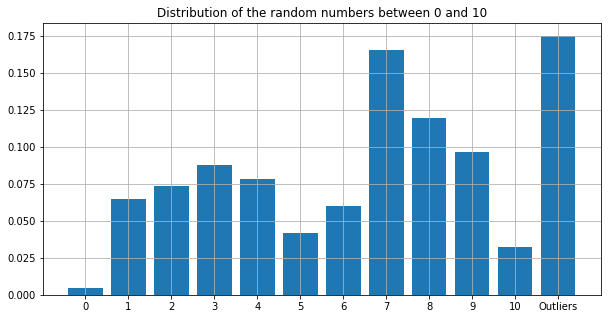

In [137]:
randomNumbers = df["random number"].copy()[1:]

nums = np.zeros(12)
for i in range(1,len(randomNumbers)+1):
    number = randomNumbers[i]
    if not number.isdigit() or int(number) < 0 or int(number) > 10:
        nums[11] += 1
        randomNumbers[i] = 11
    else:
        nums[int(number)] += 1
        randomNumbers[i] = int(number)
        
plt.figure(figsize=(10,5))
plt.title("Distribution of the random numbers between 0 and 10")
plt.bar(np.arange(12),nums / np.sum(nums))
plt.grid(True)
plt.xticks(np.arange(12),list(range(0,11))+["Outliers"])
plt.show()

# One hot encoding for the random numbers
randLabels = pd.get_dummies(randomNumbers,prefix="random_number")
randLabels.rename(columns={"random_number_11":"random_number_outlier"},inplace=True)

## Chocolate answers by gender

In [138]:
gender.head()

,gender_female,gender_male,gender_unknown
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0


In [139]:
chocolate.head()

,chocolate_I have no idea what you are talking about,chocolate_fat,chocolate_neither,chocolate_slim,chocolate_unknown
1,0,0,1,0,0
2,1,0,0,0,0
3,0,0,1,0,0
4,1,0,0,0,0
5,1,0,0,0,0


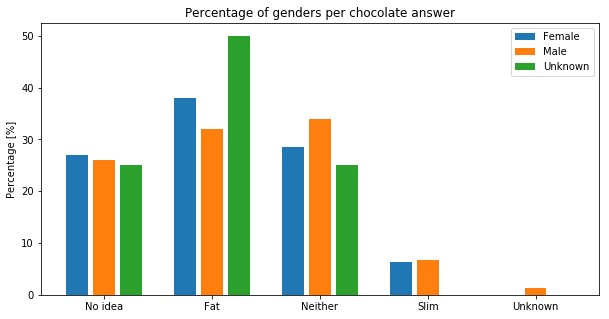

In [140]:
gender_array = np.argmax(gender.values,axis=1)
chocolate_array = np.argmax(chocolate.values,axis=1)

answer_female = np.empty(5)
answer_male = np.empty(5)
answer_unknown = np.empty(5)
for i in range(5):
    answer_female[i] = chocolate_array[np.where(chocolate_array[gender_array == 0] == i)].size
    answer_male[i] = chocolate_array[np.where(chocolate_array[gender_array == 1] == i)].size
    answer_unknown[i] = chocolate_array[np.where(chocolate_array[gender_array == 2] == i)].size

female_x = np.arange(0,17,4)
male_x = np.arange(1,18,4)
unknown_x = np.arange(2,19,4)

plt.figure(figsize=(10,5))
plt.title("Percentage of genders per chocolate answer")
plt.ylabel("Percentage [%]")

plt.bar(female_x,100 * answer_female / np.sum(answer_female),label="Female")
plt.bar(male_x,100 * answer_male / np.sum(answer_male),label="Male")
plt.bar(unknown_x,100 * answer_unknown / np.sum(answer_unknown),label="Unknown")

plt.xticks(male_x,["No idea","Fat","Neither","Slim","Unknown"])
plt.legend()
plt.show()

## Number of gendered individuals per programme

In [141]:
programme.head()

,programme_ai,programme_ba,programme_bioinformatics,programme_cls,programme_cs,programme_econometrics,programme_other,programme_qrm
1,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0


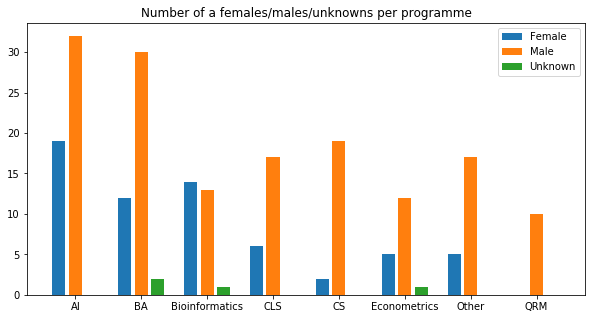

In [142]:
gender_array = np.argmax(gender.values,axis=1)
programme_array = np.argmax(programme.values,axis=1)

programme_female = np.empty(8)
programme_male = np.empty(8)
programme_unknown = np.empty(8)
for i in range(8):
    programme_female[i] = programme_array[np.where(programme_array[gender_array == 0] == i)].size
    programme_male[i] = programme_array[np.where(programme_array[gender_array == 1] == i)].size
    programme_unknown[i] = programme_array[np.where(programme_array[gender_array == 2] == i)].size

female_x = np.arange(0,29,4)
male_x = np.arange(1,30,4)
unknown_x = np.arange(2,31,4)

plt.figure(figsize=(10,5))
plt.title("Number of a females/males/unknowns per programme")

plt.bar(female_x,programme_female,label="Female")
plt.bar(male_x,programme_male,label="Male")
plt.bar(unknown_x,programme_unknown,label="Unknown")

plt.xticks(male_x,["AI","BA","Bioinformatics","CLS","CS","Econometrics","Other","QRM"])
plt.legend()
plt.show()

## Good day string average length transformation

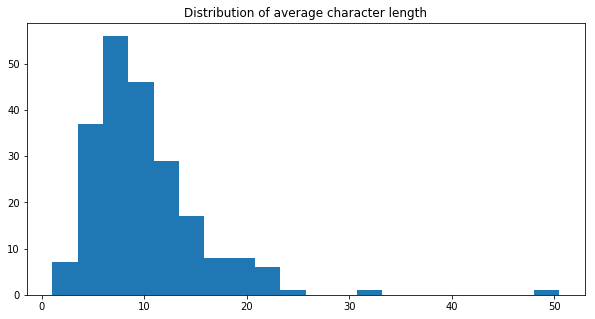

In [143]:
good_day_1 = df["good day 1"][1:]
good_day_2 = df["good day 2"][1:]

good_day_length = pd.Series(np.zeros(len(good_day_1)+1) , name = 'good day length')[1:]

for i in range(1,len(good_day_length)+1):
    good_day_length[i] = (len(good_day_1[i]) + len(good_day_2[i])) / 2

plt.figure(figsize=(10,5))
plt.title("Distribution of average character length")
plt.hist(good_day_length.values,20)
plt.show()

## Age retrieval from birthdays

In [144]:
df["birthday"][1:].head()

1        10/12/1994
2        06-08-1993
3    25 december 92
4        01-02-1995
5        09.01.1994
Name: birthday, dtype: object

In [145]:
# Retrieve rough estimate for age from birthyears in birthdays
age = df["birthday"].copy()[1:]

for i in range(1,len(age)+1):
    match = re.search("19[0-9][0-9]",age[i])
    
    if match:
        age[i] = 2018 - int(match.group())
    else:
        age[i] = np.nan

average_age = age.mean()
age.name = "Age"
age.fillna(average_age,inplace=True)

age.value_counts()

25.126582    59
24.000000    39
23.000000    33
25.000000    25
26.000000    15
22.000000    15
27.000000    12
28.000000    10
30.000000     3
31.000000     2
21.000000     1
37.000000     1
29.000000     1
87.000000     1
Name: Age, dtype: int64

## Percentage of course per programme

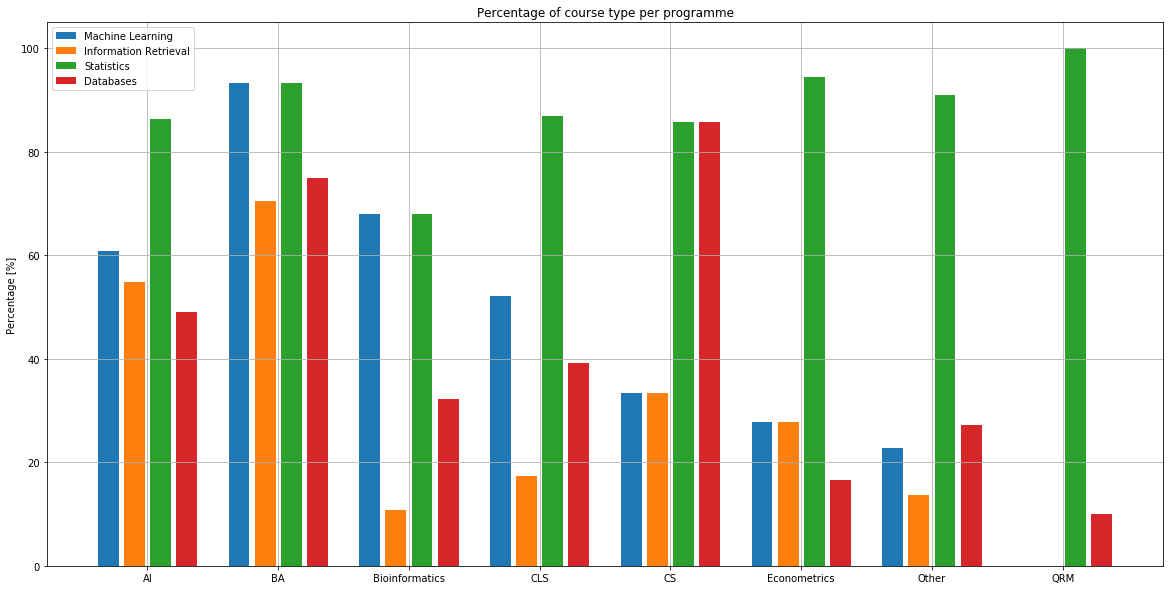

In [150]:
programme_array = np.argmax(programme.values,axis=1)
ml_array = ml["ml_yes"].values
ir_array = ir["ir_1"].values
stats_array = stats["stats_mu"].values
databases_array = databases["databases_ja"].values

programme_ml = np.empty(8)
programme_ir = np.empty(8)
programme_stats = np.empty(8)
programme_databases = np.empty(8)
for i in range(8):
    prog_instances = np.where(programme_array == i)
    
    programme_ml[i] = 100 * np.sum(ml_array[prog_instances]) / ml_array[prog_instances].size
    programme_ir[i] = 100 * np.sum(ir_array[prog_instances]) / ir_array[prog_instances].size
    programme_stats[i] = 100 * np.sum(stats_array[prog_instances]) / stats_array[prog_instances].size
    programme_databases[i] = 100 * np.sum(databases_array[prog_instances]) / databases_array[prog_instances].size
    

ml_x = np.arange(0,36,5)
ir_x = np.arange(1,37,5)
stats_x = np.arange(2,38,5)
databases_x = np.arange(3,39,5)

plt.figure(figsize=(20,10))
plt.title("Percentage of course type per programme")
plt.ylabel("Percentage [%]")
plt.grid(True)

plt.bar(ml_x,programme_ml,label="Machine Learning")
plt.bar(ir_x,programme_ir,label="Information Retrieval")
plt.bar(stats_x,programme_stats,label="Statistics")
plt.bar(databases_x,programme_databases,label="Databases")

plt.xticks((ir_x + stats_x) / 2,["AI","BA","Bioinformatics","CLS","CS","Econometrics","Other","QRM"])
plt.legend()
plt.show()

# Classification of Chocolate answers

First we select the attributes which we want to use for our classification algorithms and the target which we want to predict using these models.

In [147]:
#input_df = pd.concat([programme,ml,ir,stats,databases,gender,age,randLabels,good_day_length],axis=1)
input_df = pd.concat([programme,ml,ir,stats,databases,gender,age],axis=1)

inputs = input_df.values
target = np.argmax(chocolate.values,axis=1)

input_df.head()

,programme_ai,programme_ba,programme_bioinformatics,programme_cls,programme_cs,programme_econometrics,programme_other,programme_qrm,ml_no,ml_unknown,...,stats_mu,stats_sigma,stats_unknown,databases_ja,databases_nee,databases_unknown,gender_female,gender_male,gender_unknown,Age
1,0,0,0,0,0,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,24.000000
2,0,0,0,0,1,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,25.000000
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,25.126582
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,23.000000
5,0,0,0,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,24.000000


Next we try to train two classification algorithms using these attributes in order to predict the answer to the question "Chocolate make you ___".

We first train a naive Bayes model using a multinomial distribution for the likelihood. The score is determined using K-Fold Cross Validation.

In [148]:
model = MultinomialNB()

n = 10
avg_score = 0
kfold = KFold(n_splits=n,shuffle=False)
for train_idx, test_idx in kfold.split(inputs,target):
    x_train, x_test = inputs[train_idx], inputs[test_idx]
    t_train, t_test = target[train_idx], target[test_idx]
    
    model.fit(x_train, t_train)
    avg_score += model.score(x_test,t_test)

avg_score /= n
print("Average score Multinomial Naive Bayes: %lf" % (avg_score))

Average score Multinomial Naive Bayes: 0.437879


Next we train a Logistic Regression model. Again, the score is determined using K-Fold Cross Validation.

In [149]:
model = LogisticRegression()

n = 10

avg_score = 0
kfold = KFold(n_splits=n,shuffle=False)
for train_idx, test_idx in kfold.split(inputs,target):
    x_train, x_test = inputs[train_idx], inputs[test_idx]
    t_train, t_test = target[train_idx], target[test_idx]    
    model.fit(x_train, t_train)
    avg_score += model.score(x_test,t_test)

avg_score /= n

print("Average score Logistic Regression: %lf" % (avg_score))

Average score Logistic Regression: 0.433333
